# Data collection (v1)

In [26]:
import pandas as pd
import numpy as np
import datetime as dt

## Data collection from yahoo finance

In [27]:
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
data = yf.download('^HSI','2019-01-01')

[*********************100%***********************]  1 of 1 downloaded


[*********************100%***********************]  1 of 1 downloaded


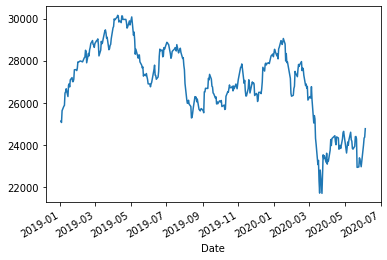

In [4]:
data = yf.download('^HSI','2019-01-01')
data.Close.plot()
plt.show()

In [5]:
data["return"]=data["High"]-data["Low"]

In [6]:
data["return"].describe()

count     352.000000
mean      320.238580
std       168.138945
min         0.000000
25%       229.857500
50%       287.825000
75%       375.012500
max      1665.160000
Name: return, dtype: float64

## Data aggregation

In [7]:
data["Date"]=data.index
data["Week"]=data["Date"].dt.week
data["Month"]=data["Date"].dt.month

In [8]:
data_weekly=data.groupby(["Week"]).agg({'Open':'first',
                                        'High':'max',
                                        'Low':'min',
                                        'Close':'last',
                                        'Volume':'sum'})

In [9]:
data_weekly.head()

,Open,High,Low,Close,Volume
Week,,,,,
1,25824.44,28883.30,24896.87,28451.50,10210979100
2,26015.84,28665.14,25688.50,28638.20,17391128400
3,26559.68,29149.53,26195.78,29056.42,16331738900
4,27134.27,29174.92,26854.66,27949.64,15767747100
5,27695.81,28193.28,26295.49,26312.63,15545537500


## Question: 

To show the index of the weekly data frame with the first date of the week

In [10]:
data_weekly=data.groupby(["Week"]).agg({'Open':'first', 'High':'max', 'Low':'min', 'Close':'last','Volume':'sum',
                                        "Date":"first"})
data_weekly.index=data_weekly["Date"]
data_weekly.head()

,Open,High,Low,Close,Volume,Date
Date,,,,,,
2019-01-02,25824.44,28883.30,24896.87,28451.50,10210979100,2019-01-02
2019-01-07,26015.84,28665.14,25688.50,28638.20,17391128400,2019-01-07
2019-01-14,26559.68,29149.53,26195.78,29056.42,16331738900,2019-01-14
2019-01-21,27134.27,29174.92,26854.66,27949.64,15767747100,2019-01-21
2019-01-28,27695.81,28193.28,26295.49,26312.63,15545537500,2019-01-28


In [11]:
def data_resample3Days(data,time_start=None,time_end=None):
    df=data.loc[time_start:time_end].copy()
    OPEN=df["Open"].resample("3D").first()
    HIGH=df["High"].resample("3D").max()
    LOW=df["Low"].resample("3D").min()
    CLOSE=df["Close"].resample("3D").last()
    df1=pd.concat([OPEN, HIGH,LOW,CLOSE], axis=1, keys=["Open","High","Low","Close"])
    return(df1)

In [12]:
data_resample3Days(data).head()

,Open,High,Low,Close
Date,,,,
2019-01-02,25824.44,25824.44,24896.87,25626.03
2019-01-05,26015.84,26043.64,25753.46,25835.70
2019-01-08,25852.50,26597.07,25688.50,26521.43
2019-01-11,26692.02,26692.02,26494.86,26667.27
2019-01-14,26559.68,26903.78,26195.78,26902.10


## Getting stock data from investing.com

In [28]:
import investpy as ipy

In [29]:
df2 = ipy.get_stock_historical_data(stock="0700", country='hong kong', from_date="01/01/2019",to_date="31/12/2019")

In [30]:
df2.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2019-01-02,315.0,315.0,306.2,306.6,15721300,HKD
2019-01-03,304.0,309.4,302.8,305.0,16420000,HKD
2019-01-04,300.4,311.0,300.4,310.6,19329100,HKD
2019-01-07,318.0,318.8,313.6,317.6,24891000,HKD
2019-01-08,318.0,318.6,312.0,315.6,16264900,HKD


## Question

In [32]:
df_stocks=pd.read_excel("D:/Stock_monitoring_list1.xlsx")
stock_list=df_stocks["Stock code"].tolist()    

In [33]:
i="0700.HK"
df1=yf.download(i,start="2019-01-01",end="2019-12-31")["Close"]
df2 = ipy.get_stock_historical_data(stock=i[:-3], country='hong kong', from_date="01/01/2019",to_date="31/12/2019")["Close"]
df3=pd.DataFrame({"investing_Close":df2,"yahoo_Close":df1})
df3["Stock_code"]=i
df3["diff"]=df3["investing_Close"]-df3["yahoo_Close"]
NA=sum(df3["diff"].isna())
NA

[*********************100%***********************]  1 of 1 completed


1

In [42]:
if sum(df3["diff"]!=0)>=1:
    Diff=1
else:
    Diff=0

In [43]:
Diff

1

In [16]:
df3[df3["diff"].isna()]

,investing_Close,yahoo_Close,Stock_code,diff
Date,,,,
2019-12-31,375.6,NaN,0700.HK,NaN


In [14]:
df3.head()

,investing_Close,yahoo_Close,Stock_code,diff
Date,,,,
2019-01-02,306.6,306.600006,0700.HK,-0.000006
2019-01-03,305.0,305.000000,0700.HK,0.000000
2019-01-04,310.6,310.600006,0700.HK,-0.000006
2019-01-07,317.6,317.600006,0700.HK,-0.000006
2019-01-08,315.6,315.600006,0700.HK,-0.000006


In [44]:
L1=[]
L2=[]
L3=[]
for i in stock_list:
    df1=yf.download(i,start="2019-01-01",end="2019-12-31")["Close"]
    df2 = ipy.get_stock_historical_data(stock=i[:-3], country='hong kong', from_date="01/01/2019",to_date="31/12/2019")["Close"]
    df3=pd.DataFrame({"investing_Close":df2,"yahoo_Close":df1})
    df3["Stock_code"]=i
    df3["diff"]=df3["investing_Close"]-df3["yahoo_Close"]
    NA=sum(df3["diff"].isna())
    if sum(df3["diff"] !=0)>=1:
        Diff=1
    else:
        Diff=0
#     #Diff_sum=df3["diff"].sum()
#     if Diff_sum!=0:
#         Diff=1
#     else:
#         Diff=0
    L1.append(Diff)
    L2.append(NA)
    L3.append(df3)
    
    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [45]:
df_summary=pd.DataFrame({"Stock_code":stock_list,
                        "diff":L1,
                        "NA":L2})

In [46]:
df_summary.head()

,Stock_code,diff,NA
0,0001.HK,1,1
1,0002.HK,1,1
2,0003.HK,1,1
3,0005.HK,1,1
4,0006.HK,1,1


In [39]:
sum(df_summary["diff"]>=1)

50

In [47]:
sum(df_summary["NA"]>=1)

50

In [53]:
df_005=L3[3]

In [56]:
df_005.sample(5)

,investing_Close,yahoo_Close,Stock_code,diff
Date,,,,
2019-11-11,59.00,59.000000,0005.HK,0.000000
2019-09-23,59.50,59.500000,0005.HK,0.000000
2019-07-31,63.35,63.349998,0005.HK,0.000002
2019-02-25,64.20,64.199997,0005.HK,0.000003
2019-01-07,64.90,64.900002,0005.HK,-0.000002


In [57]:
df_005[df_005["diff"].isna()]

,investing_Close,yahoo_Close,Stock_code,diff
Date,,,,
2019-12-31,60.85,NaN,0005.HK,NaN
